# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [23]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


#Loading the directly downloaded Twitter Archive data
TwitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

#Taking a look on the data
TwitterArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

#Downloading image_prediction.tsv using Requests library

URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(URL)
open("image-predictions.tsv", "wb").write(response.content)




335079

In [4]:
#Loading downloaded TSV file 
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
#Taking a look on our data
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = TwitterArchive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [6]:
df_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [7]:
tweet_data = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.to_csv('tweet_data.csv', index = False) 


In [8]:
#Read Tweet Data CSV file 
tweet_data = pd.read_csv('tweet_data.csv')
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Enhanced Twitter Archive Data

In [10]:
TwitterArchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
TwitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
TwitterArchive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
TwitterArchive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [31]:
TwitterArchive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [23]:
#Checking how many numerators under 10 we have
TwitterArchive[TwitterArchive['rating_numerator']< 10].count()[0]

440

In [26]:
#To see from which twitter Id the less than 10 numerator came from
TwitterArchive[TwitterArchive['rating_numerator']< 10]['tweet_id']

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [29]:
# checking rating_numerator of tweet_id is 826598799820865537
TwitterArchive.loc[(TwitterArchive['tweet_id'] == 826598799820865537),'rating_numerator']

387    7
Name: rating_numerator, dtype: int64

In [30]:
# checking content of tweet id is 826598799820865537
TwitterArchive.loc[387 , 'text']

"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating"

In [13]:
# checking which tweet_id have rating_denominator equal 0
TwitterArchive[TwitterArchive['rating_denominator'] == 0]['tweet_id']

313    835246439529840640
Name: tweet_id, dtype: int64

In [15]:
# checking text of tweet id is 835246439529840640
TwitterArchive.loc[313 , 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [16]:
# checking count rating_denominator not equal 10
TwitterArchive[TwitterArchive['rating_denominator'] != 10].count()[0]

23

In [23]:
TwitterArchive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [25]:
TwitterArchive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

## Image Prediciton Data

In [26]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
1872,844979544864018432,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
1733,821407182352777218,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,Irish_setter,0.505496,True,vizsla,0.168747,True,Chesapeake_Bay_retriever,0.111311,True
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True


## Twitter API Data

In [28]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [29]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
826,768970937022709760,7574,16017
560,802624713319034886,3403,0
1452,695446424020918272,2026,4787
253,844580511645339650,3533,17871
1253,710609963652087808,2624,5227


### Quality issues
1. The dataset includes retweets which may cause a duplication in the data.

2. Dropping in_reply_to_status_id and in_reply_to_user_id columns.
3. Correcting data type in tweet_id (from int into string).

4. Correcting data type in timestamp (from string into datetime).

5. Creating a column for dog image prediction and another column for dog image prediction confidence.

6. Removing p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, img_num columns.

7. Some dogs have a wrong names like 'a' , 'by' ,'an' , etc.

8. Converting underscore to space and convert lowercase to uppercase in pred_dog.

### Tidiness issues
1. The last four columns in TwitterArchive dataset should be merged into one column.

2. The three dataframes TwitterArchive, image_predictions and tweet_data should be merged into one dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data
TwitterArchiveCleaned = TwitterArchive.copy()

image_predictionsCleaned = image_predictions.copy()

tweet_dataCleaned = tweet_data.copy()


### To make things more easy I will start with Tidiness issues rather than quailty.

### Tidiness Issue #1: 

#### Define: The last four columns in TwitterArchive dataset doggo, floofer, pupper, and puppo columns should be one column .

#### Code

In [29]:
TwitterArchiveCleaned['dog_stage'] = TwitterArchiveCleaned['text'].str.extract('(doggo|floofer|pupper|puppo)')
#TwitterArchiveCleaned = TwitterArchiveCleaned.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'] )

#### Test

In [11]:
TwitterArchiveCleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Tidiness Issue #2:

#### Define : The three dataframes TwitterArchive, image_predictions and tweet_data should be merged into one dataframe.

#### Code

In [20]:
CleanedDf = pd.merge(TwitterArchiveCleaned, tweet_dataCleaned, on='tweet_id', how='left')
CleanedDf = pd.merge(CleanedDf, image_predictionsCleaned, on='tweet_id', how='left')

#### Test

In [13]:
CleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### Quality Issue #1 : 

#### Define: The dataset includes retweets which may cause a duplication in the data

#### Code:

In [24]:
CleanedDf = CleanedDf[np.isnan(CleanedDf.retweeted_status_id)]


In [25]:
pd.options.display.max_rows = 4000
CleanedDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [26]:
# Remove the retweets columns:
CleanedDf = CleanedDf.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test:

As we can see the columns with retweets are removed so we don't have to worry about duplicated data.

In [27]:

CleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

### Quality Issue #2 : 

#### Define: Dropping 'in_reply_to_status_id', 'in_reply_to_user_id' columns .

#### Code:


In [31]:
CleanedDf = CleanedDf.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)


#### Test:

In [33]:
CleanedDf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Quality Issue #3 : 

#### Define: Correcting data type in tweet_id (from int into string).

#### Code:


In [35]:
CleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_stage           364 non-null    object 
 9   retweet_count       2175 non-null   float64
 10  favorite_count      2175 non-null   float64
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
 16  p2    

In [36]:
CleanedDf['tweet_id'] = CleanedDf['tweet_id'].astype(str)


#### Test:

In [43]:
#To check if the Dtype of the column tweet_id has changed to Object rather than int64
CleanedDf.dtypes

tweet_id               object
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
dog_stage              object
retweet_count         float64
favorite_count        float64
jpg_url                object
img_num               float64
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
dtype: object

### Quality Issue #4 : 

#### Define: Correcting data type in timestamp (from string into datetime).

#### Code:

In [44]:
CleanedDf['timestamp'] = pd.to_datetime(CleanedDf['timestamp'])


#### Test:

In [45]:
#To check if the Dtype of the column timestamp has changed to datetime64 rather than Object
CleanedDf.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
retweet_count                     float64
favorite_count                    float64
jpg_url                            object
img_num                           float64
p1                                 object
p1_conf                           float64
p1_dog                             object
p2                                 object
p2_conf                           float64
p2_dog                             object
p3                                 object
p3_conf                           float64
p3_dog                             object
dtype: object

### Quality Issue #5 : 

#### Define: Creating one column for dog image prediction and another column for dog image prediction confidence.

#### Code:

In [49]:
pred_dog = []
pred_dog_confidence = []

def dog_image(CleanedDf):
    if CleanedDf['p1_dog'] == True:
        pred_dog.append(CleanedDf['p1'])
        pred_dog_confidence.append(CleanedDf['p1_conf'])
    elif CleanedDf['p2_dog'] == True:
        pred_dog.append(CleanedDf['p2'])
        pred_dog_confidence.append(CleanedDf['p2_conf'])
    elif CleanedDf['p3_dog'] == True:
        pred_dog.append(CleanedDf['p3'])
        pred_dog_confidence.append(CleanedDf['p3_conf'])
    else:
        pred_dog.append('Error')
        pred_dog_confidence.append('Error')
    
CleanedDf.apply(dog_image, axis=1)

CleanedDf['pred_dog'] = pred_dog
CleanedDf['pred_dog_confidence'] = pred_dog_confidence
CleanedDf = CleanedDf[CleanedDf['pred_dog'] != 'Error']

#### Test:

In [51]:
CleanedDf.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_dog,pred_dog_confidence
2229,668248472370458624,2015-11-22 02:03:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,https://twitter.com/dog_rates/status/668248472...,8,10,Bisquick,NaN,523.0,...,0.734547,True,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True,Chihuahua,0.734547
1334,705428427625635840,2016-03-03 16:23:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,pupper,1931.0,...,0.774792,True,quilt,0.073079,False,Pembroke,0.022365,True,Chihuahua,0.774792
1116,732585889486888962,2016-05-17 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...","When your teacher agreed on 10,000 RTs and no ...",https://twitter.com/dog_rates/status/732585889...,10,10,None,NaN,868.0,...,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True,Staffordshire_bullterrier,0.843359
1390,700151421916807169,2016-02-18 02:54:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,https://twitter.com/dog_rates/status/700151421...,11,10,None,pupper,754.0,...,0.328236,False,Italian_greyhound,0.176838,True,Staffordshire_bullterrier,0.134080,True,Italian_greyhound,0.176838
2122,670403879788544000,2015-11-28 00:48:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,NaN,173.0,...,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True,pug,0.802223


### Quality Issue #6 : 

#### Define: Removing p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, img_num columns.

#### Code:

In [52]:

CleanedDf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'pred_dog', 'pred_dog_confidence'],
      dtype='object')

In [53]:
CleanedDf = CleanedDf.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num'], axis=1)


#### Test:

In [54]:
CleanedDf.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'pred_dog',
       'pred_dog_confidence'],
      dtype='object')

### Quality Issue #7 : 

#### Define: Some dogs have a wrong names like 'a' , 'by' ,'an' , etc.

#### Code:

Assuming that every dog name will start with an uppercase letter, so every name that start with anything other than that we will replace it by 'No Name'

In [55]:
CleanedDf.name = CleanedDf.name.str.replace('^[a-z]+', 'No Name')

/var/folders/6w/mbhy83056zd532sj57m4rcnm0000gn/T/ipykernel_4240/294429355.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  CleanedDf.name = CleanedDf.name.str.replace('^[a-z]+', 'No Name')


#### Test:

In [56]:
CleanedDf['name'].value_counts()


None              419
No Name            80
Cooper             10
Charlie            10
Lucy               10
Tucker              9
Oliver              9
Penny               8
Winston             7
Sadie               7
Daisy               7
Toby                6
Lola                6
Koda                6
Jax                 6
Bo                  5
Leo                 5
Stanley             5
Rusty               5
Oscar               5
Bella               5
Duke                4
Louis               4
Jack                4
Scout               4
Milo                4
Chester             4
Bear                4
Finn                4
Larry               4
Dave                4
Sophie              4
Alfie               4
Dexter              4
Reggie              4
Scooter             4
Winnie              4
George              4
Bailey              4
Bentley             4
Maggie              4
Oakley              4
Brody               4
Cassie              4
Gus                 4
Kyle      

### Quality Issue #8 : 

#### Define: Converting underscore to space and convert lowercase to uppercase in pred_dog.

#### Code:

In [67]:
#This is an example of lowercase in pred_dog
CleanedDf['pred_dog'].iloc[19]

'basset'

In [68]:

CleanedDf['pred_dog'] = CleanedDf['pred_dog'].str.replace('_',' ')
CleanedDf['pred_dog'] = CleanedDf['pred_dog'].str.title()

#### Test:

In [69]:
#After fixing the lowercase problem
CleanedDf['pred_dog'].iloc[19]

'Basset'

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
CleanedDf.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Cooper and Charlie share the 1st place in terms of most popular dogs names, If we exluded None and No Name since they are not a real names but a problem with the data.

2. The most popular dogs types are Golden Retriever then Labrador Retriever.

3. 66.8% of the dogs in the data are Puppers, while only 1.1% are floofers

#### All of the previous insights are concluded from the visualizations bellow:

### Visualization

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
ND = CleanedDf['name'].value_counts()
ND = ND.head(10)
ND

None       419
No Name     80
Cooper      10
Charlie     10
Lucy        10
Tucker       9
Oliver       9
Penny        8
Winston      7
Sadie        7
Name: name, dtype: int64

Text(0.5, 1.0, 'The most popular dogs names')

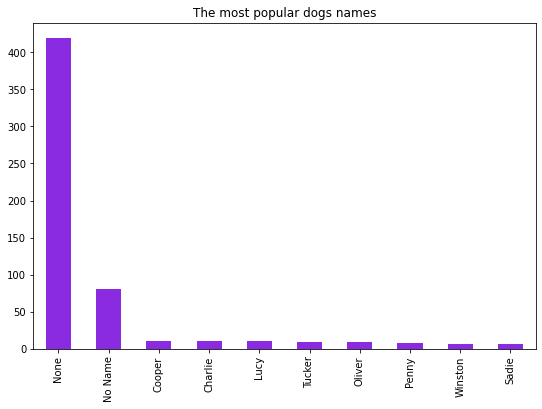

In [92]:
ND.plot(kind='bar',figsize = (9,6), color = 'blueviolet')
plt.title('The most popular dogs names')


In [83]:
PD = CleanedDf['pred_dog'].value_counts()
PD = PD.head(10)
PD 

Golden Retriever      158
Labrador Retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Toy Poodle             51
Chow                   48
Samoyed                42
Pomeranian             42
Malamute               33
Name: pred_dog, dtype: int64

Text(0, 0.5, 'Dog \n')

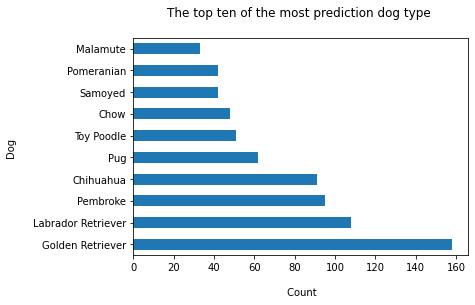

In [84]:
PD.plot(kind = 'barh')
plt.title('The top ten of the most prediction dog type \n')
plt.xlabel('\n Count')
plt.ylabel('Dog \n')

In [98]:
DS = CleanedDf['dog_stage'].value_counts()
DS

pupper     183
doggo       61
puppo       27
floofer      3
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'The percentage of different dog stages')

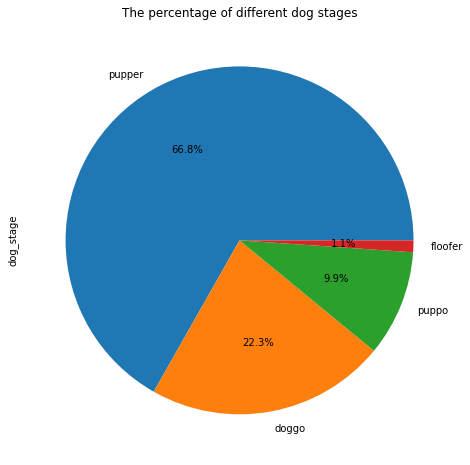

In [99]:
DS.plot(kind='pie', figsize = (8,8), autopct='%1.1f%%')
plt.title("The percentage of different dog stages")